# Band alignment using LDOS method

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import palettable
import os

# PBE level of theory using LDOS method

## 1. We need to compute the wavefunctions at PBE level, and take the average on xy plane
The results are shown in <a href="./interface/westpp">westpp</a>.

## 2. Compute the local density of states

The code used to compute LDOS and the results are shown in <a href="./interface/ldos/">ldos</a>.

## 3. post-process the results and compute the valence and conduction band offsets.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
xmap = []
ymap = []
cmap = []
with open('./interface/ldos/cmap.dat', 'r') as f:
    line = f.readline()
    nxx = int(line.split()[0])
    nex = int(line.split()[1])
    for i in range(nxx):
        for j in range(nex):
            line = f.readline()
            xmap.append(float(line.split()[0]))
            ymap.append(float(line.split()[1]))
            cmap.append(float(line.split()[2]))
xmap = np.array(xmap)
ymap = np.array(ymap)
cmap = np.array(cmap)
xmap = np.reshape(xmap, (nxx,int(len(xmap)/nxx)))
ymap = np.reshape(ymap, (int(len(ymap)/nex),nex))
cmap = np.reshape(cmap, (nxx,int(len(cmap)/nxx)))
# print(int(len(xmap)/nxx))
# print(xmap[:,3])
# print(ymap[3,:])

homox = []
homoe = []
lumox = []
lumoe = []

with open('./interface/ldos/homo_lumo.dat', 'r') as f:
    line = f.readline()
    line = f.readline()
    while 'lumo' not in line:
        homox.append(float(line.split()[0]))
        homoe.append(float(line.split()[1]))
        line = f.readline()
    line = f.readline()
    while line != '':
        lumox.append(float(line.split()[0]))
        lumoe.append(float(line.split()[1]))
        line = f.readline()
        
e_axis = []
dos = []
with open('./interface/ldos/dos.dat', 'r') as f:
    line = f.readline()
    while line != '':
        e_axis.append(float(line.split()[0]))
        dos.append(float(line.split()[1]))   
        line = f.readline()
tmp = max(dos)
for i in range(len(dos)):
    dos[i] = dos[i]/tmp
tmpi = 0
for i in range(1,len(dos)):
    if dos[i] < dos[tmpi]:
        tmpi = i
dos_min = dos[tmpi]
en_min = e_axis[tmpi]

Eg(Si): 0.672238805970137
Eg(Si3N4): 2.9924626865671655
VBO: 0.8257462686567241
CBO: 1.4944776119403045


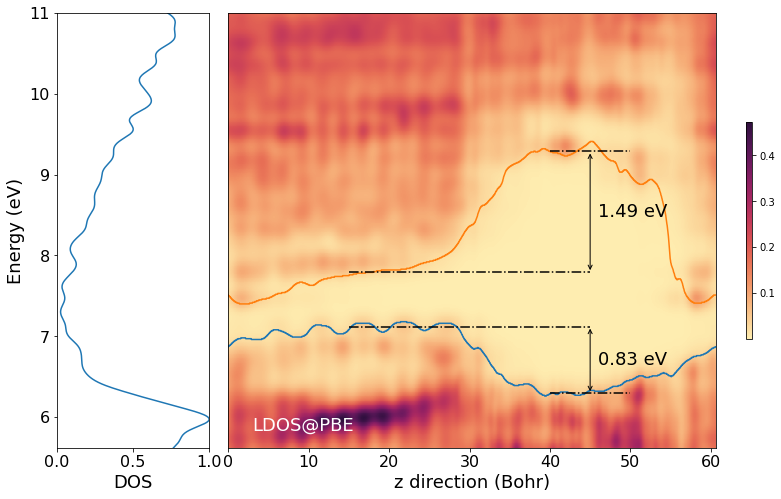

In [3]:
from palettable.colorbrewer.sequential import Blues_8
from palettable.cmocean.sequential import Matter_12
from matplotlib import gridspec

fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,4])
gs.update(wspace=0.05)
ax = fig.add_subplot(gs[0])
plt.plot(dos,e_axis)

# plt.annotate(
#     '', xy=(dos_min, en_min),
#     xytext=(dos_min+0.2, en_min),
#     arrowprops=dict(arrowstyle='->', ) )
# plt.text(dos_min+0.2, en_min, '%6.2f eV'%(en_min), fontsize=18, va='center')

plt.xlim([0,1])
plt.ylim([5.62,11])
plt.ylabel('Energy (eV)', fontsize=18)
plt.xlabel('DOS', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax = fig.add_subplot(gs[1])
## pre-process
homo_si = []
lumo_si = []
homo_n = []
lumo_n = []
for i in range(len(homox)):
    if 15 < homox[i] < 20:
            homo_si.append(homoe[i])
for i in range(len(lumox)):
    if 15 < lumox[i] < 20:
        lumo_si.append(lumoe[i])
for i in range(len(homox)):
    if 40 < homox[i] < 45:
        homo_n.append(homoe[i])
for i in range(len(lumox)):
    if 40 < lumox[i] < 45:
        lumo_n.append(lumoe[i])
homo_si = sum(homo_si)/len(homo_si)
lumo_si = sum(lumo_si)/len(lumo_si)
homo_n = sum(homo_n)/len(homo_n)
lumo_n = sum(lumo_n)/len(lumo_n)
vbo = homo_si - homo_n
cbo = lumo_n - lumo_si
print('Eg(Si):',lumo_si-homo_si)
print('Eg(Si3N4):',lumo_n-homo_n)
print("VBO:", homo_si-homo_n)
print("CBO:", lumo_n-lumo_si)


heatmap = ax.pcolormesh(xmap,ymap,cmap,cmap=Matter_12.mpl_colormap)
cbar = plt.colorbar(heatmap, orientation='vertical', shrink=0.5, aspect=40)
# CS = plt.contour(xmap,ymap,cmap,levels=[0.04])

plt.plot(homox, homoe)
plt.plot(lumox, lumoe)
plt.plot([15,45], [homo_si, homo_si], '-.',c='k')
plt.plot([15,45], [lumo_si, lumo_si], '-.',c='k')
plt.plot([40,50], [homo_n,  homo_n ], '-.',c='k')
plt.plot([40,50], [lumo_n,  lumo_n ], '-.',c='k')
# plt.annotate(
#     '', xy=(15, homo_si),
#     xytext=(15, lumo_si),
#     arrowprops=dict(arrowstyle='<->', ) )
plt.annotate(
    '', xy=(45, homo_n),
    xytext=(45, homo_si),
    arrowprops=dict(arrowstyle='<->') )
plt.annotate(
    '', xy=(45, lumo_n),
    xytext=(45, lumo_si),
    arrowprops=dict(arrowstyle='<->') )
# plt.text(16, 0.5*(homo_si+lumo_si), '%4.2f eV'%(lumo_si-homo_si), fontsize=18, va='center')
plt.text(46, 0.5*(homo_si+homo_n), '%4.2f eV'%(homo_si-homo_n), fontsize=18, va='center')
plt.text(46, 0.5*(lumo_si+lumo_n), '%4.2f eV'%(lumo_n-lumo_si), fontsize=18, va='center')

# plt.plot([0,60],[en_min, en_min])

plt.ylim([5.62,11])
[xmin, xmax] = ax.get_xlim()
[ymin, ymax] = ax.get_ylim()

plt.text(xmin+0.05*(xmax-xmin), ymin+0.04*(ymax-ymin), 'LDOS@PBE', fontsize=18, color='white')
plt.xlabel('z direction (Bohr)', fontsize=18)
# plt.ylabel('Energy (eV)', fontsize=18)
plt.yticks([])
ax.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# fig.savefig('KS_LDOS.png', bbox_inches='tight',dpi=200)

In [4]:
print("PBE level of theory:")
print(f"VBO = {vbo:.2f} eV")
print(f"CBO = {cbo:.2f} eV")

PBE level of theory:
VBO = 0.83 eV
CBO = 1.49 eV


# GW@PBE level of theory using LDOS method
The GW corrections are computed with bulk silicon and silicon carbide.

## Add GW corrections to PBE energy levels to get band offsets at GW@PBE level
The GW corrections are computed in [Si](./Si-post-process.ipynb) and [Si3N4](./Si3N4-post-process.ipynb)

In [26]:
si_homo_gw = 5.5340
si_lumo_gw = 6.8240

si3n4_homo_gw = 6.9861
si3n4_lumo_gw = 11.7631

In [34]:
## Readin DFT/PBE results of Si
si_pbe = []
with open('./Si/pw/eigenval.xml','r') as f:
    line = f.readline()
    while line != '':
        si_pbe.append(float(line)*27.2114)
        line = f.readline()
si_homo_pbe = si_pbe[127]
si_lumo_pbe = si_pbe[128]

## Readin DFT/PBE results of Si3N4
si3n4_pbe = []
with open('./Si3N4/pw/eigenval.xml','r') as f:
    line = f.readline()
    while line != '':
        si3n4_pbe.append(float(line)*27.2114)
        line = f.readline()
si3n4_homo_pbe = si3n4_pbe[127]
si3n4_lumo_pbe = si3n4_pbe[128]
print(f"Si     PBE   GW@PBE")
print(f"HOMO {si_homo_pbe:6.2f} {si_homo_gw:6.2f}")
print(f"LUMO {si_lumo_pbe:6.2f} {si_lumo_gw:6.2f}")
print("\n")
print(f"Si3N4  PBE   GW@PBE")
print(f"HOMO {si3n4_homo_pbe:6.2f} {si3n4_homo_gw:6.2f}")
print(f"LUMO {si3n4_lumo_pbe:6.2f} {si3n4_lumo_gw:6.2f}")

Si     PBE   GW@PBE
HOMO   6.27   5.53
LUMO   6.94   6.82


Si3N4  PBE   GW@PBE
HOMO   8.30   6.99
LUMO  11.49  11.76


In [37]:
vbo_gw = vbo + abs(abs(si_homo_pbe-si_homo_gw)-abs(si3n4_homo_pbe-si3n4_homo_gw))
cbo_gw = cbo + abs(abs(si_lumo_pbe-si_lumo_gw)+abs(si3n4_lumo_pbe-si3n4_lumo_gw))

In [38]:
print("GW level of theory:")
print(f"VBM = {vbo_gw:.2f} eV")
print(f"VBM = {cbo_gw:.2f} eV")

GW level of theory:
VBM = 1.40 eV
VBM = 1.89 eV
